In [2]:
import numpy as np
import matplotlib.pyplot as plt

[6.3088  0.41372 0.36873]


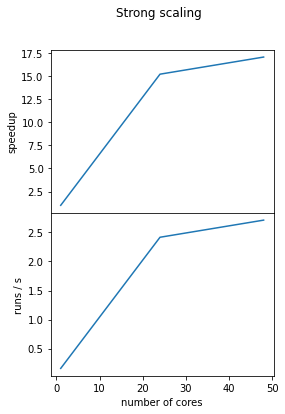

In [11]:
# 210622 parallel strong scaling (work==100 runs, increase ncores)
# e.g. time seq 100 | parallel -P 24 python mixing.py >> log
# took 1st run only
t1 = 630.880  # [s] time to run 1 core
cores = np.array([1, 24, 48])
time = np.array([t1, 39.878, 35.110])
speedup = t1 / time  # frac
t_per_core = time / cores  # [s] 

# Plot
f, ax = plt.subplots(2, sharex=True, figsize=(4, 6))
f.subplots_adjust(hspace=0)
f.suptitle('Strong scaling')
ax[0].plot(cores, speedup)
ax[0].set_ylabel('speedup')
ax[1].plot(cores, 100/time)
ax[1].set_ylabel('runs / s')
ax[1].set_xlabel('number of cores')
plt.show()

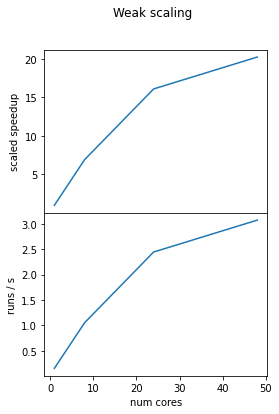

In [4]:

# 210622 parallel weak scaling (nruns == ncores)
# e.g. time seq 24 | parallel -P 24 python mixing.py >> log
# take median of 3 runs 
t1 = 6.575  # [s] time to run once on 1 core
runs = np.array([1, 8, 24, 48])
cores = np.array([1, 8, 24, 48])
time = np.array([t1, 7.607, 9.808, 15.606])
t_per_core = time / cores  # [s] 
scaled_speedup = t1 / t_per_core  # frac

f, ax = plt.subplots(2, sharex=True, figsize=(4, 6))
f.subplots_adjust(hspace=0)
f.suptitle('Weak scaling')
ax[0].plot(cores, scaled_speedup)
ax[0].set_ylabel('scaled speedup')
ax[1].plot(cores, runs/time)
ax[1].set_ylabel('runs / s')
ax[1].set_xlabel('num cores')
plt.show()

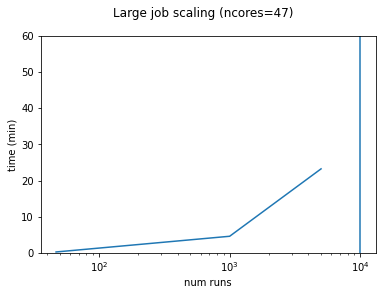

In [17]:
# 210623 very weak scaling (nruns >> ncores)
# e.g. time seq 1000 | parallel -P-1 python mixing.py >> log
# take median of 3 runs 
t1 = 17.064  # [s] time for 1 run / core
cores = 47
runs = np.array([47, 1000, 5000])
time = np.array([t1, 277.088, 1393.231])
t_per_core = time / cores  # [s] 
scaled_speedup = t1 / t_per_core  # frac

f, ax = plt.subplots(figsize=(6, 4))
f.subplots_adjust(hspace=0)
f.suptitle(f'Large job scaling (ncores={cores})')
ax.axvline(10000)
ax.semilogx(runs, time/60)
ax.set_ylabel('time (min)')
ax.set_xlabel('num runs')
ax.set_ylim(0, 60)
plt.show()